Associazioni -> ricerca dati in più tabelle rimuovendo le ridondanze tramite le chiavi primarie -> JOIN


In [2]:
SELECT Orders.OrderID, Customers.CustomerName, Orders.OrderDate
FROM Orders, Customers
WHERE Orders.CustomerID=Customers.CustomerID   //EQUIJOIN
AND Customers.Country='Italy'

SyntaxError: invalid syntax (3749241005.py, line 1)

Seleziona OrderID in Orders, CustomerName in Customers e OrderDate in Orders

Dalla tabella Orders e Customers

Dove CustomerID di Orders è uguale al CustomerID in Customers (EQUIJOIN)

E dove Country di Customer è Italy

In alternativa INNER JOIN

In [ ]:
SELECT Orders.OrderID, Customers.CustomerName, Orders.OrderDate
FROM Orders //TABELLA 1
INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID //INNERJOIN*
WHERE Customers.Country='Italy'

Inner join ci evita di usare la join nella WHERE

FROM Orders-> la tabella 1

INNER JOIN Customers -> tabella 2

*Fai una INNER JOIN tra Orders e Customers associando CustomerID di Orders (1) e Customers (2)

INNER JOIN tra più tabelle

In [ ]:

SELECT Orders.OrderID, Customers.CustomerName, Shippers.ShipperName
FROM Orders
INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID
INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
WHERE Customers.Country='Italy';

Seleziono dalla tabelle Orders da cui effettuiamo:

	• Inner join con Customers dove associamo CustomerID di Orders e Customers
	
	• Inner join con Shippers dove associamo ShipperID di Orders e Shippers

OUTJOIN

LEFT OUTER JOIN

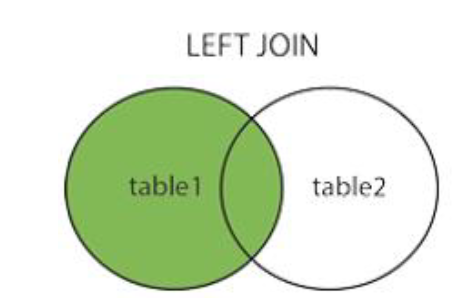

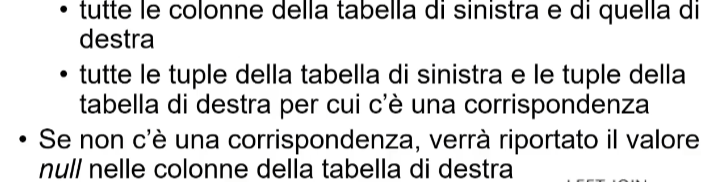

In [ ]:
SELECT Customers.CustomerName, Orders.OrderID //<-DESTRA
FROM Customers //SINISTRA
LEFT JOIN Orders ON Customers.CustomerID = Orders.CustomerID
ORDER BY Customers.CustomerName;

Tutte le tuple di Customers.CustomerName(SINISTRA) e solamente quelle di Orders.OrderID(DESTRA) che hanno una corrispondenza con il CustomerID altrimenti andrà a NULL
Possono esserci quindi OrderID a NULL

RIGHT OUTER JOIN

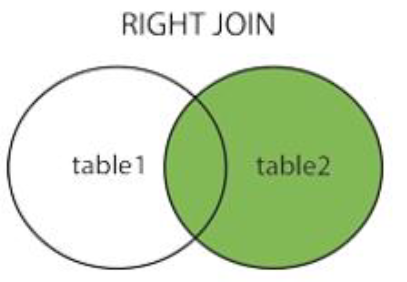

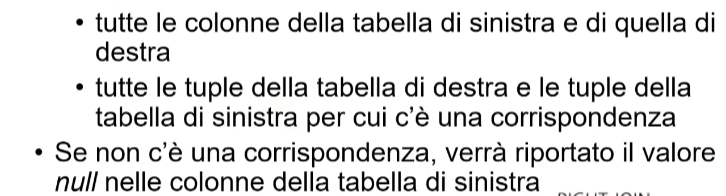

In [ ]:
SELECT Orders.OrderID, Employees.LastName, Employees.FirstName //<-DESTRA
FROM Orders //SINISTRA
RIGHT JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
ORDER BY Orders.OrderID;

Tutte le tuple di quelle di Empolyees.NOME(DESTRA) e solamente quelle di  Orders.OrderID(SINISTRA) che hanno una corrispondenza con EmployeeID di Orders ed Employees altrimenti andrà a NULL

Possono esserci quindi OrderID a NULL

FULL OUTER JOIN

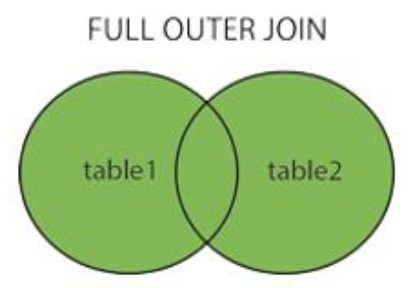

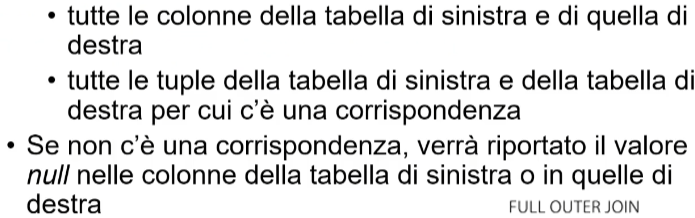

In [ ]:
SELECT Customers.CustomerName, Orders.OrderID
FROM Customers
FULL OUTER JOIN Orders ON Customers.CustomerID=Orders.CustomerID
ORDER BY Customers.CustomerName;

Seleziona tutti quelli a destra ed a sinistra

Quindi ci possono essere OrderID e CustomerName a null qualora non ci sia corrispondenza

SELF JOIN -> Autocongiunzione

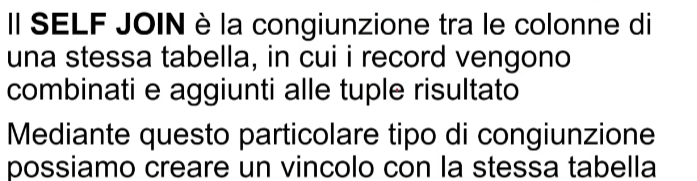


In [ ]:
SELECT A.CustomerName AS CustomerName1, B.CustomerName AS CustomerName2, A.City
FROM Customers A, Customers B
WHERE A.CustomerID <> B.CustomerID
AND A.City = B.City
ORDER BY A.City;

Seleziona le colonne CustomerName e City dalla tabella Customers. Per eseguire un self join, la tabella Customers viene inclusa due volte con due diversi alias, A e B. Gli alias aiutano a fare riferimento alle diverse istanze della stessa tabella.

WHERE specifica due condizioni:

	• A.CustomerID <> B.CustomerID 

	assicura che i record con gli stessi CustomerID non vengano confrontati tra loro per evitare di confrontarsi con se stesso

	•  A.City = B.City

	confronta le città dei clienti nelle due istanze della tabella Customers e seleziona solo i record in cui le città corrispondono 
	
ORDER BY A.City ordina i risultati in base alla colonna City dell'alias A.

In sintesi, questa query restituisce una lista di coppie di clienti che risiedono nella stessa città, mostrando il nome del primo cliente come CustomerName1, il nome del secondo cliente come CustomerName2 e la città in cui entrambi risiedono. I risultati sono ordinati in base al nome della città.

FUNZIONI AGGREGAZIONE 

Ritornano un solo valore


SELECT COUNT(ProductID)

FROM Products;

Conta quanti ProductID ci sono in Products

--------------------

SELECT AVG(Price)

FROM Products;

Calcola la media dal campo Price in Products

--------------------

SELECT SUM(Quantity)

FROM OrderDetails;

Somma tutti i valori del campo Quantity in OrderDetails

-------------------------------------

SELECT MAX(Price)

FROM Products;

Trova il Price massimo in Products

---------------------------------

SELECT STDEV(Price)

FROM Products;

Calcola la deviazione standard tra i campi Price in Products

------------------------

FUNZIONI RAGGRUPPAMENTO

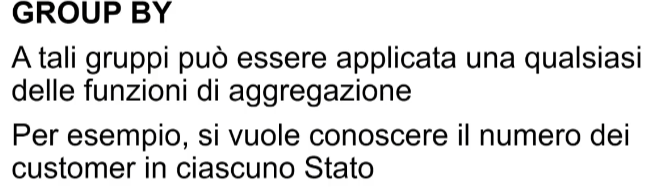

In [ ]:
SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country

Conta quanti CustomerID da Customers ci stanno per ciascun Country

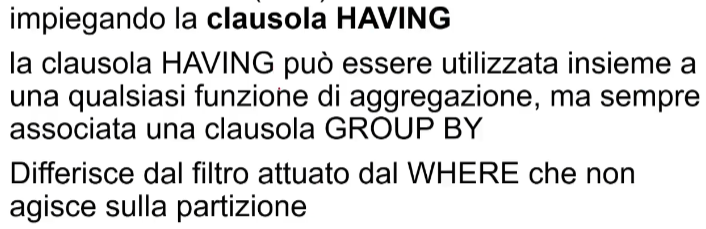


In [ ]:
SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country
HAVING COUNT(CustomerID)>=5

Il numero dei CustomerID da Customers in ciascino Country che hanno almeno 5 CustomerID


QUERY ANNIDATE

Combina la SELECT di più query


SELECT MAX(Price)

FROM Products 

Non funziona perché non sappiamo il prezzo massimo

-------------------------

SELECT *

FROM Products

WHERE Price= (SELECT MAX(Price)  //query annidata

				FROM Products)

Seleziono tutto da Products

Dove Price sarà uguale al risultato di un'altra query che :

SELEZIONA il Price massimo da Products
